<a href="https://colab.research.google.com/github/Gialbo/COVID-Chest-X-Rays-Deep-Learning-analysis/blob/main/experiments/cGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conditional GAN

## Import libraries and data

In [ ]:
# IMPORT AND MOUNT DRIVE
import tensorflow as tf
import numpy as np
import os
import os.path
import sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # CLONE GITHUB REPOSITORY
!rm -r "COVID-Chest-X-Rays-Deep-Learning-analysis"
!git clone https://github.com/Gialbo/COVID-Chest-X-Rays-Deep-Learning-analysis.git

rm: cannot remove 'COVID-Chest-X-Rays-Deep-Learning-analysis': No such file or directory
Cloning into 'COVID-Chest-X-Rays-Deep-Learning-analysis'...
remote: Enumerating objects: 1293, done.
remote: Counting objects: 100% (704/704), done.
remote: Compressing objects: 100% (537/537), done.
remote: Total 1293 (delta 434), reused 384 (delta 167), pack-reused 589
Receiving objects: 100% (1293/1293), 110.36 MiB | 15.58 MiB/s, done.
Resolving deltas: 100% (697/697), done.


In [ ]:
# LOAD DIRECTORIES
sys.path.append('COVID-Chest-X-Rays-Deep-Learning-analysis/models')
sys.path.append('COVID-Chest-X-Rays-Deep-Learning-analysis/tools')

In [ ]:
# LOAD TRAINING DATA

from XRaysDataset import XRaysDataset

batch_size = 64

dataset = XRaysDataset(batch_size=batch_size)
train_datasets, training_size = dataset.load(separate_classes=False)

Dataset size  3443
Number of batches for the dataset: 54


## Normal Model

### Training

In [ ]:
# LOAD MODEL
from cGAN import cGAN

In [ ]:
# set checkpoint directory
checkpoint_dir = '/content/drive/MyDrive/BIOINF/checkpoints_GAN/cGAN'
out_images_path = '/content/drive/MyDrive/BIOINF/checkpoints_GAN/cGAN/outImages'


cGAN = cGAN(checkpoint_dir=checkpoint_dir,
                out_images_path=out_images_path,
                use_residual=True)

# noise used during training in order to evaluate how the network is learning
benchmark_noise = np.random.randn(cGAN.latent_size * cGAN.batch_size)
# reshape into a batch of inputs for the network
benchmark_noise = benchmark_noise.reshape(cGAN.batch_size, cGAN.latent_size )
# generate labels
benchmark_labels = np.random.randint(0, 3, cGAN.batch_size)

# train model
cGAN.train_model(train_datasets, benchmark_noise, benchmark_labels)

### Results

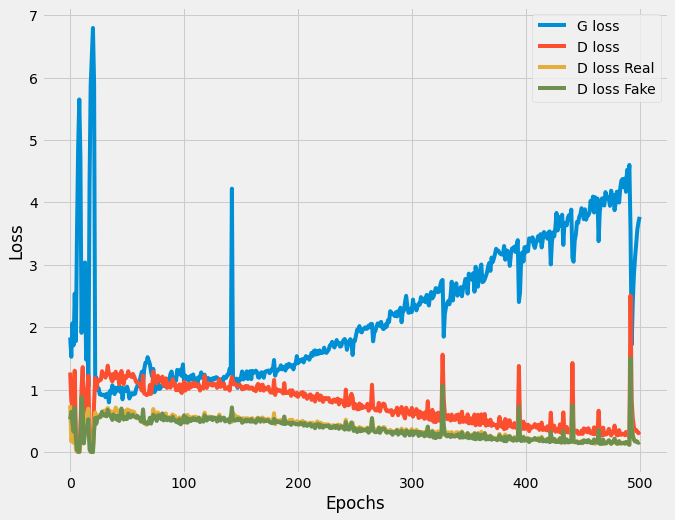

In [ ]:
import matplotlib.pyplot as plt

with plt.style.context('fivethirtyeight'):
  cGAN.plot_losses(cGAN.history, "Epochs", "Loss")

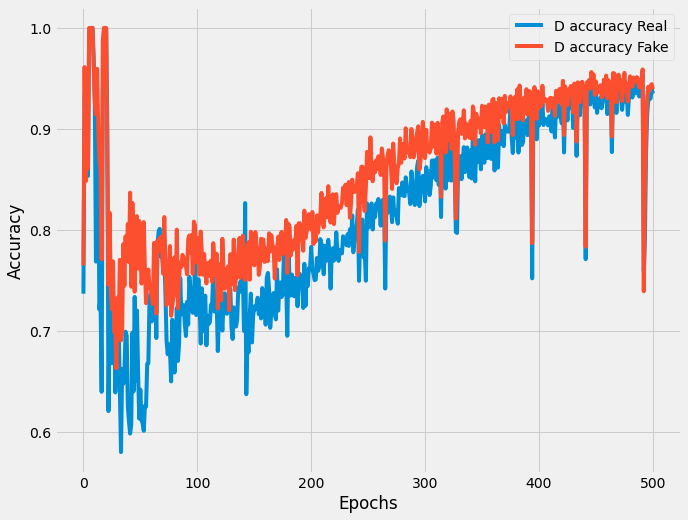

In [ ]:
with plt.style.context('fivethirtyeight'):
  cGAN.plot_losses(cGAN.accuracy, "Epochs", "Accuracy")

In [ ]:
from images_to_gif import images_to_gif
images_to_gif('/content/drive/MyDrive/BIOINF/checkpoints_GAN/cGAN/outImages/*.png', '/content/drive/MyDrive/BIOINF/checkpoints_GAN/cGAN/outImages/cGAN.gif')

## Min Uncertainty Model

### Training

In [ ]:
# LOAD MODEL
from cGAN_Uncertainty import cGANUnc

In [ ]:
# set checkpoint directory
checkpoint_dir = '/content/drive/MyDrive/BIOINF/checkpoints_GAN/cGAN_unc_min'
out_images_path = '/content/drive/MyDrive/BIOINF/checkpoints_GAN/cGAN_unc_min/outImages'


model = cGANUnc(checkpoint_dir=checkpoint_dir,
                n_epochs=500,
                out_images_path=out_images_path,
                use_residual=True,
                mcd=4,
                unc_weight=1,
                unc_type="min")

# noise used during training in order to evaluate how the network is learning
benchmark_noise = np.random.randn(model.latent_size * model.batch_size)
# reshape into a batch of inputs for the network
benchmark_noise = benchmark_noise.reshape(model.batch_size, model.latent_size )
# generate labels
benchmark_labels = np.random.randint(0, 3, model.batch_size)

# train model
model.train_model(train_datasets, benchmark_noise, benchmark_labels)

### Results

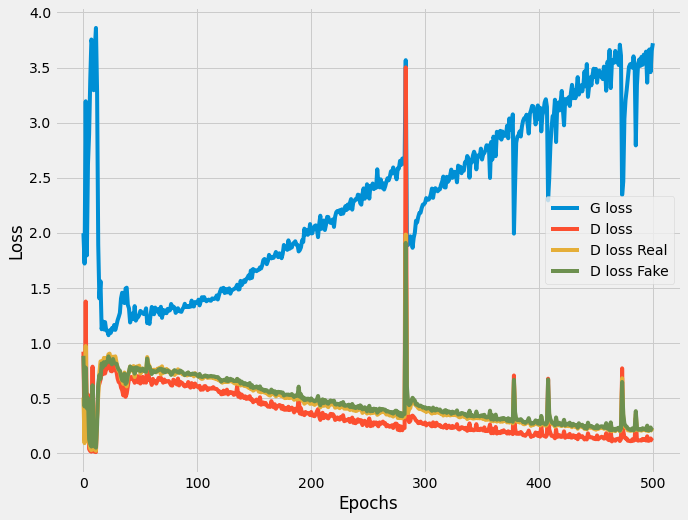

In [ ]:
import matplotlib.pyplot as plt

with plt.style.context('fivethirtyeight'):
  model.plot_stats(model.history, "Epochs", "Loss")

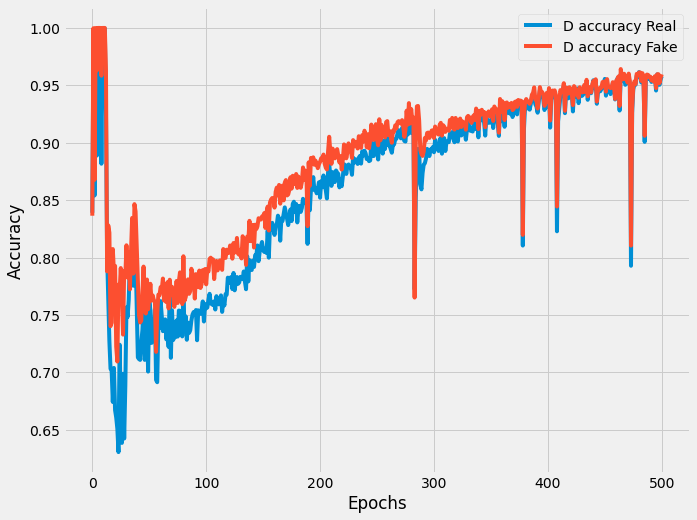

In [ ]:
with plt.style.context('fivethirtyeight'):
  model.plot_stats(model.accuracy, "Epochs", "Accuracy")

In [ ]:
from images_to_gif import images_to_gif
images_to_gif('/content/drive/MyDrive/BIOINF/checkpoints_GAN/cGAN_unc_min/outImages/*.png', '/content/drive/MyDrive/BIOINF/checkpoints_GAN/cGAN_unc_min/outImages/cGAN_unc_min.gif')

## Max Uncertainty Model

### Training

In [ ]:
# LOAD MODEL
from cGAN_Uncertainty import cGANUnc

In [ ]:
# set checkpoint directory
checkpoint_dir = '/content/drive/MyDrive/BIOINF/checkpoints_GAN/cGAN_unc_max'
out_images_path = '/content/drive/MyDrive/BIOINF/checkpoints_GAN/cGAN_unc_max/outImages'


model = cGANUnc(checkpoint_dir=checkpoint_dir,
                n_epochs=500,
                out_images_path=out_images_path,
                use_residual=True,
                mcd=4,
                unc_weight=1,
                unc_type="max")

# noise used during training in order to evaluate how the network is learning
benchmark_noise = np.random.randn(model.latent_size * model.batch_size)
# reshape into a batch of inputs for the network
benchmark_noise = benchmark_noise.reshape(model.batch_size, model.latent_size )
# generate labels
benchmark_labels = np.random.randint(0, 3, model.batch_size)

# train model
model.train_model(train_datasets, benchmark_noise, benchmark_labels)

### Results

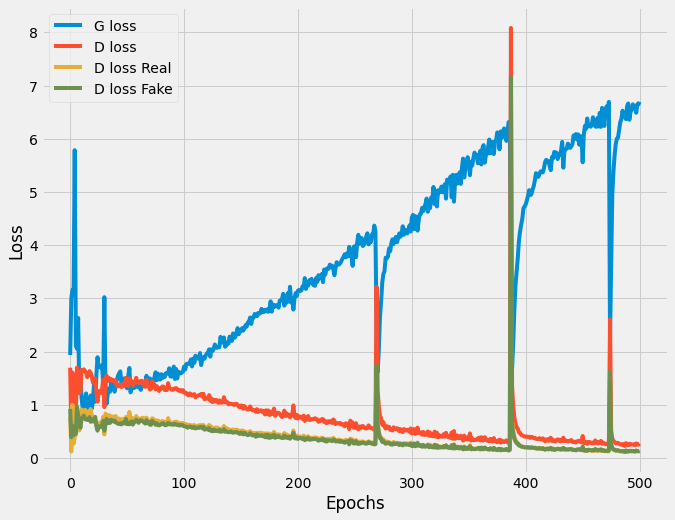

In [ ]:
import matplotlib.pyplot as plt

with plt.style.context('fivethirtyeight'):
  model.plot_stats(model.history, "Epochs", "Loss")

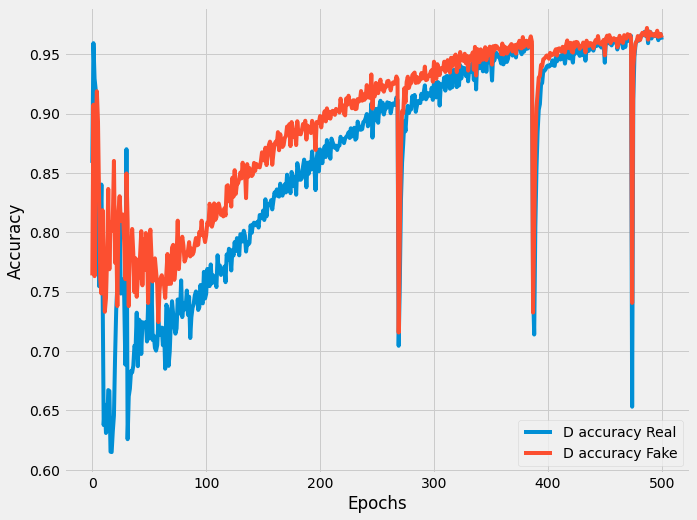

In [ ]:
with plt.style.context('fivethirtyeight'):
  model.plot_stats(model.accuracy, "Epochs", "Accuracy")

In [ ]:
from images_to_gif import images_to_gif
images_to_gif('/content/drive/MyDrive/BIOINF/checkpoints_GAN/cGAN_unc_max/outImages/*.png', '/content/drive/MyDrive/BIOINF/checkpoints_GAN/cGAN_unc_max/outImages/cGAN_unc_max.gif')